In [2]:
#Importing dependencies
# TensorFlow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


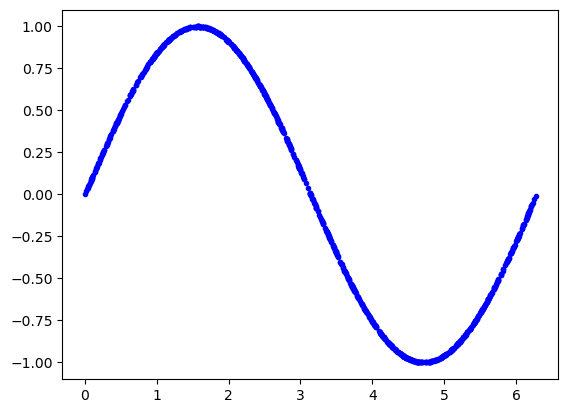

In [3]:

NUM_OF_SAMPLES = 1000
SEED = 6453


np.random.seed(SEED)
tf.random.set_seed(SEED)

x_values = np.random.uniform(low=0, high=2*math.pi, size=NUM_OF_SAMPLES)

np.random.shuffle(x_values)

y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')
plt.show()


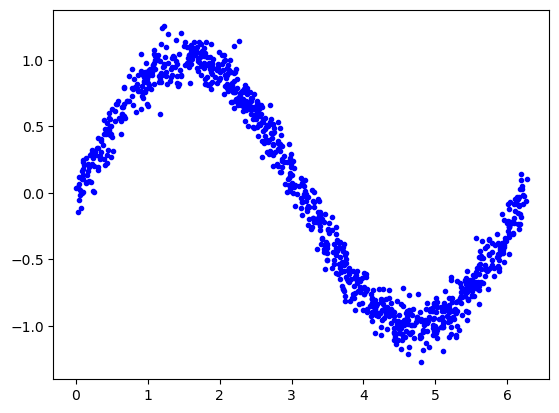

In [4]:
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

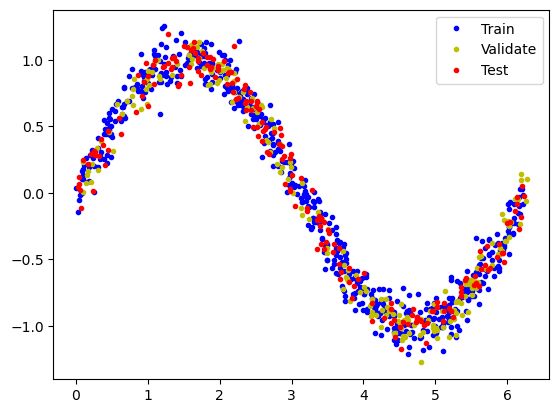

In [5]:
TRAINING_SPLIT = int(0.6 * NUM_OF_SAMPLES)
TESTING_SPLIT = int(0.2 * NUM_OF_SAMPLES + TRAINING_SPLIT)


x_train, x_validate, x_test = np.split(x_values, [TRAINING_SPLIT, TESTING_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAINING_SPLIT, TESTING_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) == NUM_OF_SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()

In [6]:
model_1 = tf.keras.Sequential()

model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

model_1.add(tf.keras.layers.Dense(1))

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
 validation_data=(x_validate, y_validate))


Epoch 1/1000


38/38 [==============================] - 1s 8ms/step - loss: 0.7179 - mae: 0.7465 - val_loss: 0.6809 - val_mae: 0.7455
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5708 - mae: 0.6806 - val_loss: 0.5471 - val_mae: 0.6720
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5050 - mae: 0.6395 - val_loss: 0.5331 - val_mae: 0.6622
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4972 - mae: 0.6338 - val_loss: 0.5259 - val_mae: 0.6569
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4889 - mae: 0.6275 - val_loss: 0.5179 - val_mae: 0.6505
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4797 - mae: 0.6203 - val_loss: 0.5096 - val_mae: 0.6444
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4710 - mae: 0.6133 - val_loss: 0.5018 - val_mae: 0.6382
Epoch 8/1000
38/38 [==============================] - 0s 4ms/step - loss: 

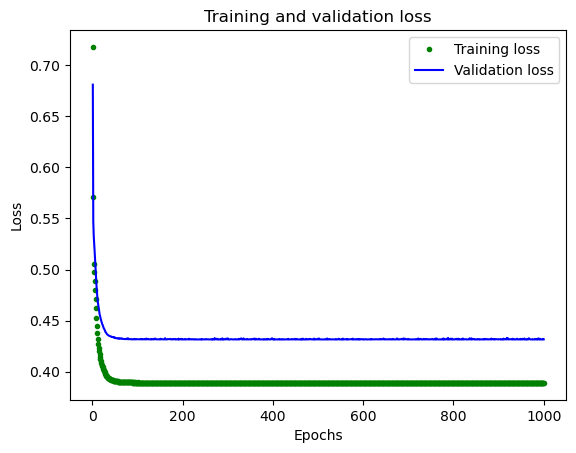

In [8]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


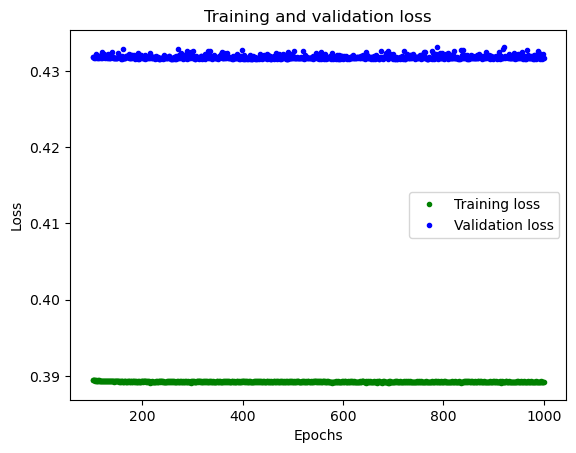

In [9]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


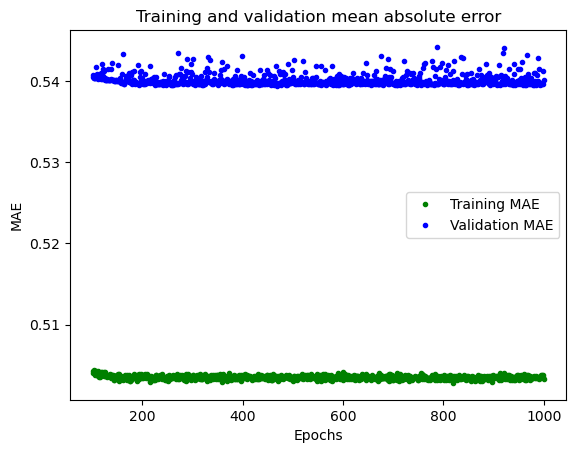

In [10]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


19/19 [==============================] - 0s 2ms/step


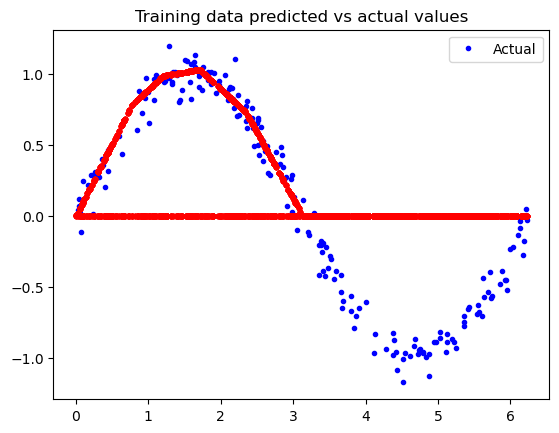

In [11]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.')
plt.legend()
plt.show()


In [12]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(tf.keras.layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(tf.keras.layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
 validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 [==============================] - 1s 8ms/step - loss: 0.4659 - mae: 0.5969 - val_loss: 0.4096 - val_mae: 0.5597
Epoch 2/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3888 - mae: 0.5341 - val_loss: 0.3694 - val_mae: 0.5255
Epoch 3/600
38/38 [==============================] - 0s 4ms/step - loss: 0.3519 - mae: 0.5063 - val_loss: 0.3419 - val_mae: 0.5125
Epoch 4/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3132 - mae: 0.4812 - val_loss: 0.3007 - val_mae: 0.4814
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2736 - mae: 0.4502 - val_loss: 0.2721 - val_mae: 0.4636
Epoch 6/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2400 - mae: 0.4244 - val_loss: 0.2451 - val_mae: 0.4303
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2125 - mae: 0.4000 - val_loss: 0.2176 - val_mae: 0.4088
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1884 - m

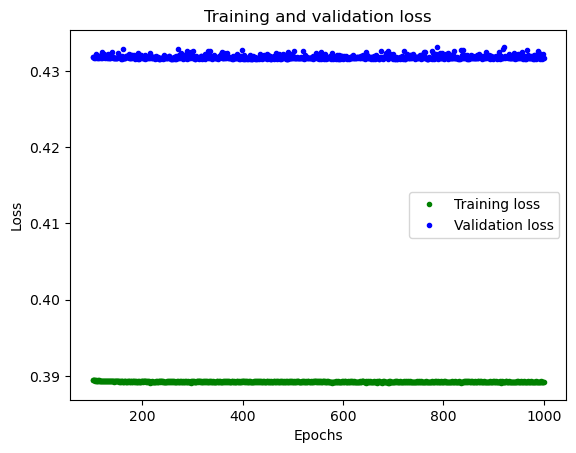

In [14]:
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 [==============================] - 0s 2ms/step


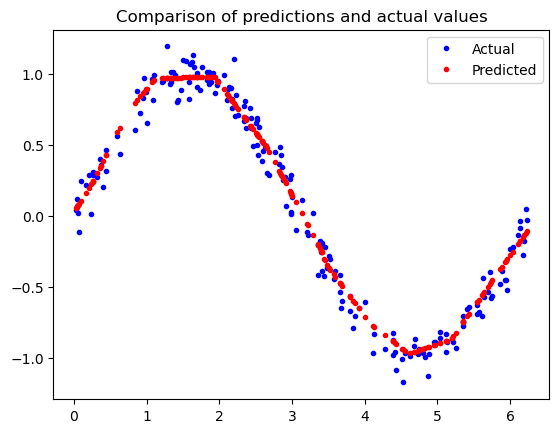

In [15]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [18]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open(r"./sine_model.tflite", "wb+").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)

# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator

# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open(r"./sine_model_quantized.tflite", "wb+").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\jona1\AppData\Local\Temp\tmpag3x_n2x\assets


INFO:tensorflow:Assets written to: C:\Users\jona1\AppData\Local\Temp\tmpag3x_n2x\assets


INFO:tensorflow:Assets written to: C:\Users\jona1\AppData\Local\Temp\tmpotv70icr\assets


INFO:tensorflow:Assets written to: C:\Users\jona1\AppData\Local\Temp\tmpotv70icr\assets
c:\Users\jona1\anaconda3\Lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3040

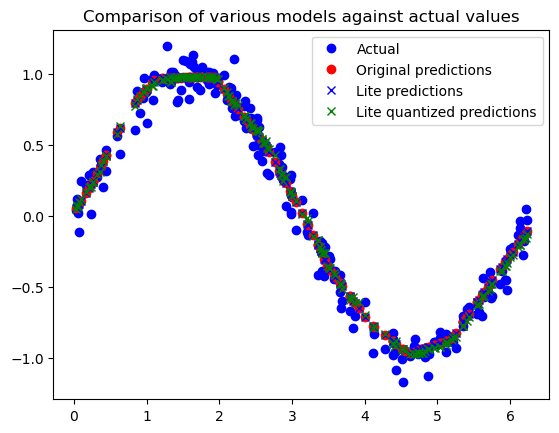

In [24]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('./sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('./sine_model_quantized.tflite')
# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
 sine_model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
 # Create a 2D tensor wrapping the current x value
 x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
 # Write the value to the input tensor
 sine_model.set_tensor(sine_model_input_index, x_value_tensor)
 # Run inference
 sine_model.invoke()
 # Read the prediction from the output tensor
 sine_model_predictions.append(
 sine_model.get_tensor(sine_model_output_index)[0])
 # Do the same for the quantized model
 sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
 sine_model_quantized.invoke()
 sine_model_quantized_predictions.append(
 sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])
# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')

plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [26]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)


Basic model is 3192 bytes
Quantized model is 3040 bytes
Difference is 152 bytes
